In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import pandas as pd
import os
import cv2

In [2]:
model = YOLO('yolov8n-obb.yaml').load('yolov8n.pt')

Transferred 355/397 items from pretrained weights


# 01. TRAINING

In [6]:
result = model.train(
    data='../dataset/data.yaml',
    epochs=500,
    patience=100,
    imgsz=256,
    cache=True,
    device=0,
    workers=0,
    project="Synapses-Model",
    name="training001",
    exist_ok=True,
    plots=True
)

Ultralytics YOLOv8.2.12  Python-3.11.9 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=obb, mode=train, model=yolov8n-obb.yaml, data=../dataset/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=True, device=0, workers=0, project=Synapses-Model, name=training001, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning D:\CHALLENGES\synapsis\model\dataset\train\labels... 869 images, 0 backgrounds, 0 corrupt: 100%|██████████| 869/869 [00:01<00:00, 612.79it/s]


train: New cache created: D:\CHALLENGES\synapsis\model\dataset\train\labels.cache


train: Caching images (0.2GB RAM): 100%|██████████| 869/869 [00:00<00:00, 1197.94it/s]
val: Scanning D:\CHALLENGES\synapsis\model\dataset\valid\labels... 290 images, 0 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<00:00, 621.38it/s]

val: New cache created: D:\CHALLENGES\synapsis\model\dataset\valid\labels.cache



val: Caching images (0.1GB RAM): 100%|██████████| 290/290 [00:00<00:00, 1344.82it/s]


Plotting labels to Synapses-Model\training001\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to Synapses-Model\training001
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500     0.895G      1.676      2.238      2.335         23        256:  98%|█████████▊| 54/55 [00:10<00:00,  6.33it/s]c:\Users\zakis\anaconda3\envs\synapsis\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      1/500     0.895G      1.669      2.218      2.324          7        256: 100%|██████████| 55/55 [00:10<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.64it/s]

                   all        290        290      0.538      0.283      0.499      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500     0.885G      1.062      1.062      1.874         14        256: 100%|██████████| 55/55 [00:08<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        290        290       0.52      0.684      0.554      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500     0.885G      0.988     0.9683      1.851          7        256: 100%|██████████| 55/55 [00:10<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        290        290      0.494      0.755      0.525      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500     0.885G     0.9615     0.8818      1.846          7        256: 100%|██████████| 55/55 [00:10<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.98it/s]

                   all        290        290        0.5      0.712      0.548      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500     0.818G     0.9253     0.8033      1.838          7        256: 100%|██████████| 55/55 [00:10<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        290        290      0.554      0.818      0.582      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500     0.818G     0.8897     0.7779      1.797         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        290        290      0.464      0.565      0.525      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500     0.818G     0.9029      0.759      1.852         14        256: 100%|██████████| 55/55 [00:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        290        290      0.497      0.887      0.528      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500     0.807G     0.8447     0.7157      1.816         15        256: 100%|██████████| 55/55 [00:10<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        290        290      0.512      0.811      0.538      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500     0.816G     0.8294     0.6889      1.787         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        290        290      0.563      0.573      0.563      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500     0.816G     0.8243     0.6587      1.841          7        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        290        290      0.559      0.658      0.574      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500     0.818G     0.8103     0.6253      1.804         13        256: 100%|██████████| 55/55 [00:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        290        290      0.535      0.763      0.555      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500     0.807G      0.785     0.6022      1.823          7        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        290        290      0.533      0.657      0.553      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500     0.816G     0.7888     0.5963      1.802          7        256: 100%|██████████| 55/55 [00:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.17it/s]

                   all        290        290      0.619      0.591      0.583      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500     0.816G     0.7899     0.6075      1.778         11        256: 100%|██████████| 55/55 [00:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        290        290      0.875       0.54      0.568      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500     0.816G     0.7904     0.5808       1.77          8        256: 100%|██████████| 55/55 [00:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        290        290      0.549      0.705      0.541      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      0.81G     0.7691     0.5462      1.793         14        256: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        290        290      0.597      0.746      0.577      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500     0.816G     0.7657      0.547      1.773          6        256: 100%|██████████| 55/55 [00:10<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.97it/s]

                   all        290        290      0.509      0.902      0.587       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500     0.816G     0.7559     0.5609       1.76         14        256: 100%|██████████| 55/55 [00:10<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        290        290      0.537      0.629      0.549      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500     0.816G     0.7474     0.5572      1.774          8        256: 100%|██████████| 55/55 [00:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        290        290       0.53      0.712      0.559      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500     0.807G     0.7471     0.5298      1.782          9        256: 100%|██████████| 55/55 [00:10<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        290        290      0.589      0.543      0.538      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500     0.816G     0.7429     0.5334      1.767         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        290        290      0.562      0.694      0.571       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500     0.816G     0.7243     0.5028      1.751          5        256: 100%|██████████| 55/55 [00:10<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]

                   all        290        290      0.512      0.844      0.519      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500     0.816G     0.7228     0.5245      1.725          9        256: 100%|██████████| 55/55 [00:11<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]

                   all        290        290      0.664      0.538      0.546      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500     0.807G     0.7374     0.5142      1.783         12        256: 100%|██████████| 55/55 [00:10<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.03it/s]

                   all        290        290      0.536      0.627      0.554      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500     0.816G     0.7452     0.5034      1.763         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.89it/s]

                   all        290        290      0.574      0.624      0.594      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500     0.816G     0.7457     0.5147      1.784         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.88it/s]

                   all        290        290      0.653      0.594      0.607      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500     0.816G     0.7158     0.5201      1.762          6        256: 100%|██████████| 55/55 [00:10<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        290        290      0.557      0.565      0.572      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500     0.807G     0.7195     0.5045      1.751          9        256: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.00it/s]

                   all        290        290      0.566      0.716      0.565      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500     0.816G     0.7122     0.4916      1.735          8        256: 100%|██████████| 55/55 [00:10<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        290        290      0.557      0.712      0.576      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500     0.816G     0.7299     0.5103      1.811          9        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        290        290      0.596      0.655      0.609      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500     0.816G     0.7095     0.5157      1.777         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        290        290      0.595      0.848      0.619      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500     0.807G     0.7136     0.4996      1.757          7        256: 100%|██████████| 55/55 [00:10<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        290        290      0.599      0.672      0.593       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500     0.816G     0.7149     0.4856      1.758         11        256: 100%|██████████| 55/55 [00:09<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        290        290      0.589      0.596      0.571      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500     0.816G     0.6964     0.4662      1.742          7        256: 100%|██████████| 55/55 [00:10<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.99it/s]

                   all        290        290      0.519      0.686       0.54      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500     0.816G     0.6915     0.4645      1.724         12        256: 100%|██████████| 55/55 [00:09<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        290        290      0.568      0.627      0.554      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      0.81G     0.6856     0.4642       1.72          9        256: 100%|██████████| 55/55 [00:10<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        290        290       0.55      0.629      0.552       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500     0.816G     0.7085     0.4694      1.761          9        256: 100%|██████████| 55/55 [00:09<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        290        290      0.574       0.67      0.569      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500     0.816G     0.6871     0.4604      1.761          9        256: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.08it/s]

                   all        290        290      0.553      0.646      0.542       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500     0.816G     0.6626     0.4684       1.74         13        256: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        290        290      0.547      0.607      0.549      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500     0.807G     0.6992     0.4676      1.773          8        256: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        290        290      0.562      0.787      0.577      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500     0.816G     0.6914      0.461      1.774          8        256: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        290        290      0.567      0.722       0.56      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500     0.816G     0.6672     0.4565      1.724         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.05it/s]

                   all        290        290      0.538      0.607      0.524      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500     0.816G     0.7013      0.474      1.771         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.04it/s]

                   all        290        290      0.662      0.605      0.584      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      0.81G      0.673     0.4539      1.739          8        256: 100%|██████████| 55/55 [00:10<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        290        290      0.636      0.655      0.602      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500     0.816G     0.6891     0.4694      1.779         13        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        290        290      0.563      0.732      0.582      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500     0.816G     0.6703     0.4681      1.742          7        256: 100%|██████████| 55/55 [00:10<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.03it/s]

                   all        290        290      0.554       0.54      0.548      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500     0.816G     0.6611     0.4525      1.761         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.13it/s]

                   all        290        290      0.594      0.688      0.602      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      0.81G     0.6714     0.4467      1.728          9        256: 100%|██████████| 55/55 [00:10<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        290        290      0.556      0.658      0.577      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500     0.816G      0.671     0.4504      1.741         12        256: 100%|██████████| 55/55 [00:09<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        290        290       0.61      0.654      0.606      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500     0.816G     0.6886     0.4681      1.774          6        256: 100%|██████████| 55/55 [00:10<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.13it/s]

                   all        290        290      0.563      0.746      0.596      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500     0.816G     0.6743      0.446      1.787         13        256: 100%|██████████| 55/55 [00:10<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        290        290      0.584      0.716      0.566      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500     0.807G     0.6511     0.4325      1.725         13        256: 100%|██████████| 55/55 [00:10<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        290        290      0.582      0.801      0.596      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500     0.816G     0.6527     0.4353      1.733          6        256: 100%|██████████| 55/55 [00:10<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.97it/s]

                   all        290        290       0.56      0.694      0.566      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500     0.816G     0.6318     0.4162      1.745          7        256: 100%|██████████| 55/55 [00:10<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.17it/s]

                   all        290        290      0.542      0.694      0.569       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500     0.816G     0.6433     0.4224      1.743         17        256: 100%|██████████| 55/55 [00:10<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        290        290      0.571       0.64      0.586      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500     0.807G     0.6448     0.4211      1.728          7        256: 100%|██████████| 55/55 [00:10<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.98it/s]

                   all        290        290      0.623      0.584      0.578      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500     0.816G     0.6648     0.4302      1.745          9        256: 100%|██████████| 55/55 [00:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.07it/s]

                   all        290        290      0.585      0.664      0.566      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500     0.818G     0.6294     0.4084      1.743          8        256: 100%|██████████| 55/55 [00:10<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]

                   all        290        290      0.566       0.65      0.569      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500     0.816G     0.6502     0.4254      1.765          9        256: 100%|██████████| 55/55 [00:10<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        290        290      0.606      0.666      0.595      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500     0.807G     0.6421     0.4254      1.758          8        256: 100%|██████████| 55/55 [00:10<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        290        290      0.708      0.603      0.605      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500     0.816G     0.6429      0.438      1.772          6        256: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        290        290      0.582      0.748      0.595       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500     0.816G     0.6585     0.4334      1.762         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]

                   all        290        290      0.567      0.672      0.565      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500     0.816G     0.6114     0.4005      1.702          5        256: 100%|██████████| 55/55 [00:10<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.00it/s]

                   all        290        290      0.568      0.627      0.582      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500     0.807G     0.6137     0.4076      1.722          7        256: 100%|██████████| 55/55 [00:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        290        290      0.533       0.67      0.534      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500     0.816G     0.6567      0.439      1.765         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.04it/s]

                   all        290        290      0.555      0.599      0.531      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500     0.816G     0.6265     0.4186       1.72          8        256: 100%|██████████| 55/55 [00:10<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.05it/s]

                   all        290        290      0.514      0.586      0.527      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500     0.816G     0.6302     0.4268      1.735         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        290        290      0.544      0.585      0.568      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500     0.807G     0.6212     0.4035       1.71         12        256: 100%|██████████| 55/55 [00:10<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        290        290      0.574      0.671      0.572      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500     0.816G      0.615     0.4255       1.72         12        256: 100%|██████████| 55/55 [00:10<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.13it/s]

                   all        290        290      0.625      0.604      0.591      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500     0.816G     0.6369     0.4141      1.724          6        256: 100%|██████████| 55/55 [00:10<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        290        290      0.633      0.556       0.57      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500     0.816G     0.6353     0.4142      1.738          8        256: 100%|██████████| 55/55 [00:09<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        290        290      0.581      0.616      0.565      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500     0.807G     0.6267     0.4113      1.737          9        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        290        290      0.586      0.627      0.597      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500     0.816G     0.5917      0.401       1.73         14        256: 100%|██████████| 55/55 [00:09<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        290        290      0.609      0.675      0.585      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500     0.816G     0.6243     0.4012      1.707         13        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        290        290      0.579       0.65      0.556      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500     0.816G       0.62     0.4099      1.719          8        256: 100%|██████████| 55/55 [00:09<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        290        290      0.574      0.585      0.538      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      0.81G     0.5993     0.3981      1.734         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        290        290      0.594      0.629      0.575      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500     0.816G     0.6027     0.3919        1.7         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        290        290      0.669      0.624      0.617      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500     0.816G     0.6029     0.4036      1.737         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        290        290      0.644      0.586      0.579       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500     0.816G      0.599     0.3962      1.756          9        256: 100%|██████████| 55/55 [00:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        290        290       0.65      0.605      0.549      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500     0.807G     0.6027      0.393       1.71         12        256: 100%|██████████| 55/55 [00:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        290        290      0.595      0.565      0.539      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500     0.816G     0.5955     0.3918      1.715         11        256: 100%|██████████| 55/55 [00:09<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        290        290      0.569      0.667      0.554       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500     0.816G     0.6079     0.3925      1.713         12        256: 100%|██████████| 55/55 [00:09<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        290        290      0.566      0.648      0.568      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500     0.816G     0.5897     0.3899      1.747          9        256: 100%|██████████| 55/55 [00:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        290        290      0.497      0.563      0.519      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500     0.807G     0.5851     0.3763      1.716         12        256: 100%|██████████| 55/55 [00:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        290        290      0.589       0.62      0.549      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500     0.816G     0.5964     0.3835      1.718         13        256: 100%|██████████| 55/55 [00:09<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.03it/s]

                   all        290        290      0.581      0.692      0.601      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500     0.816G     0.5971     0.3872       1.74         11        256: 100%|██████████| 55/55 [00:10<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        290        290      0.554      0.561      0.579      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500     0.816G     0.5928     0.3825      1.711         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        290        290      0.614      0.627      0.596      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500     0.807G     0.5905     0.3865      1.709         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.26it/s]

                   all        290        290      0.589      0.604       0.56      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500     0.816G     0.5979     0.3837      1.745         11        256: 100%|██████████| 55/55 [00:09<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        290        290        0.6      0.648      0.577      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500     0.816G     0.5982     0.3908       1.71          7        256: 100%|██████████| 55/55 [00:09<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        290        290      0.522       0.52      0.566      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500     0.816G     0.5908      0.395       1.75         13        256: 100%|██████████| 55/55 [00:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        290        290      0.578      0.647      0.551      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500     0.807G     0.5964     0.3979      1.722          6        256: 100%|██████████| 55/55 [00:09<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        290        290      0.585      0.626       0.56      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500     0.816G     0.5824     0.3789      1.718         12        256: 100%|██████████| 55/55 [00:09<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        290        290      0.632      0.623      0.588      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500     0.816G     0.5739     0.3606      1.705          5        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        290        290      0.541      0.607      0.546      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500     0.816G     0.5984     0.3787      1.707          7        256: 100%|██████████| 55/55 [00:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        290        290      0.607      0.586      0.574      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500     0.807G     0.5773     0.3742       1.72          7        256: 100%|██████████| 55/55 [00:09<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        290        290      0.525      0.607       0.55      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500     0.816G     0.5794     0.3795      1.724          9        256: 100%|██████████| 55/55 [00:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.77it/s]

                   all        290        290      0.537      0.593      0.527       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500     0.816G     0.5819     0.3793       1.71          6        256: 100%|██████████| 55/55 [00:10<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.87it/s]

                   all        290        290      0.606      0.605      0.586      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500     0.816G     0.5813     0.3846      1.742         12        256: 100%|██████████| 55/55 [00:12<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.41it/s]

                   all        290        290      0.673       0.56      0.551      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500     0.807G     0.5932     0.3726      1.698         11        256: 100%|██████████| 55/55 [00:09<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.04it/s]

                   all        290        290      0.604      0.563      0.533      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500     0.816G     0.5743     0.3718      1.718          8        256: 100%|██████████| 55/55 [00:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.24it/s]

                   all        290        290      0.508      0.783      0.525      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500     0.818G     0.5905     0.3841      1.725         14        256: 100%|██████████| 55/55 [00:09<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        290        290      0.571      0.543      0.546      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500     0.816G     0.5777     0.3786      1.712          8        256: 100%|██████████| 55/55 [00:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        290        290      0.542      0.632      0.568      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500     0.807G      0.579     0.3747      1.716         12        256: 100%|██████████| 55/55 [00:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        290        290      0.564      0.649      0.554      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500     0.816G     0.5509      0.359      1.698          7        256: 100%|██████████| 55/55 [00:09<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        290        290      0.605      0.632      0.611      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500     0.816G     0.5736     0.3698      1.694         10        256: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        290        290      0.468      0.519      0.524       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500     0.816G      0.555     0.3694      1.712         12        256: 100%|██████████| 55/55 [00:09<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        290        290      0.608       0.63       0.59      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500     0.807G     0.5482     0.3576      1.712         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.26it/s]

                   all        290        290      0.578      0.624       0.57      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500     0.816G     0.5782     0.3669       1.73          6        256: 100%|██████████| 55/55 [00:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        290        290       0.61       0.65      0.566      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500     0.816G     0.5456     0.3547      1.698          6        256: 100%|██████████| 55/55 [00:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]

                   all        290        290      0.579      0.622      0.559      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500     0.816G     0.5441     0.3564      1.679         12        256: 100%|██████████| 55/55 [00:09<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        290        290      0.613      0.601      0.563      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500     0.807G      0.567     0.3666      1.738         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        290        290      0.621      0.565      0.564       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500     0.816G     0.5471     0.3571      1.708          5        256: 100%|██████████| 55/55 [00:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.18it/s]

                   all        290        290      0.634      0.591      0.564      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500     0.816G     0.5523     0.3555      1.698          9        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        290        290      0.526      0.609      0.532      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500     0.816G     0.5519     0.3623       1.69         12        256: 100%|██████████| 55/55 [00:10<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        290        290      0.658      0.609      0.598      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500     0.807G     0.5631     0.3619      1.703         12        256: 100%|██████████| 55/55 [00:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.26it/s]

                   all        290        290      0.677      0.584      0.573      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500     0.816G     0.5593     0.3673      1.739         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        290        290      0.576      0.645      0.599      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500     0.816G     0.5355     0.3452      1.709         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        290        290      0.657      0.583      0.562      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500     0.816G     0.5523     0.3609      1.708         13        256: 100%|██████████| 55/55 [00:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        290        290       0.59      0.664      0.608      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500     0.807G     0.5255     0.3484      1.712         10        256: 100%|██████████| 55/55 [00:09<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        290        290      0.587      0.607      0.561      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500     0.816G     0.5435     0.3564      1.701          8        256: 100%|██████████| 55/55 [00:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        290        290      0.535      0.666      0.546      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500     0.816G     0.5434      0.342      1.692          8        256: 100%|██████████| 55/55 [00:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        290        290      0.581      0.703       0.59      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500     0.816G     0.5488     0.3686      1.681         14        256: 100%|██████████| 55/55 [00:10<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        290        290      0.643      0.556      0.537      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500     0.807G     0.5533     0.3606      1.697          6        256: 100%|██████████| 55/55 [00:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        290        290      0.554      0.565      0.532      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500     0.816G     0.5329     0.3397      1.667          8        256: 100%|██████████| 55/55 [00:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        290        290      0.531      0.587      0.533      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500     0.816G     0.5444     0.3591       1.69          9        256: 100%|██████████| 55/55 [00:09<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.26it/s]

                   all        290        290      0.603      0.585       0.56      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500     0.816G     0.5514     0.3617      1.704         11        256: 100%|██████████| 55/55 [00:09<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        290        290      0.594      0.629      0.561       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500     0.807G     0.5615     0.3584      1.706          6        256: 100%|██████████| 55/55 [00:09<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        290        290      0.532      0.826      0.595      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500     0.816G     0.5394     0.3557      1.699          8        256: 100%|██████████| 55/55 [00:09<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.33it/s]

                   all        290        290      0.593      0.627      0.559      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500     0.816G     0.5348     0.3481      1.704          6        256: 100%|██████████| 55/55 [00:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.40it/s]

                   all        290        290      0.549      0.585      0.558      0.444
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 30, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



130 epochs completed in 0.517 hours.
Optimizer stripped from Synapses-Model\training001\weights\last.pt, 6.4MB
Optimizer stripped from Synapses-Model\training001\weights\best.pt, 6.4MB

Validating Synapses-Model\training001\weights\best.pt...
Ultralytics YOLOv8.2.12  Python-3.11.9 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n-obb summary (fused): 187 layers, 3077609 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.14it/s]


                   all        290        290      0.594      0.655      0.609      0.518
               fatigue        290        267      0.953      0.832       0.95      0.814
             unfatigue        290         23      0.236      0.478      0.268      0.222
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to Synapses-Model\training001


### Confusion Matrix

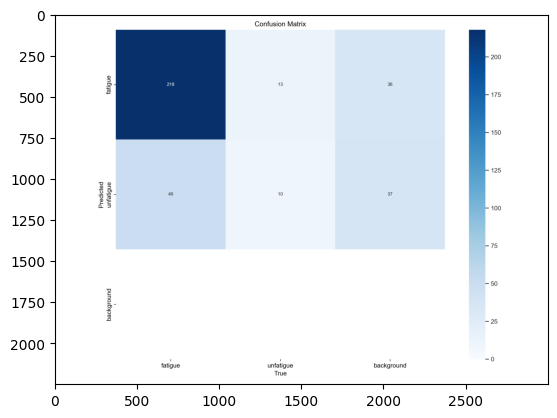

In [20]:
cf_matrix = plt.imread('./Synapses-Model/training001/confusion_matrix.png')
plt.imshow(cf_matrix)

### PR Curve

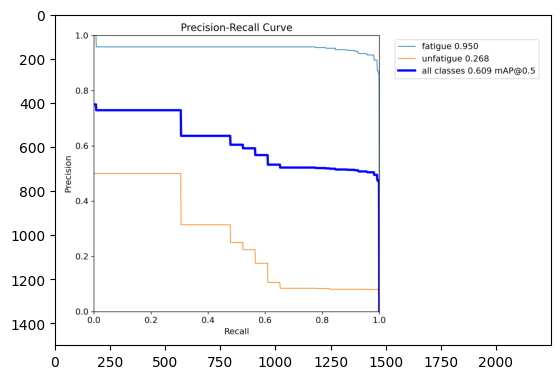

In [21]:
pr_curve = plt.imread('./Synapses-Model/training001/PR_curve.png')
plt.imshow(pr_curve)

### F1 Curve

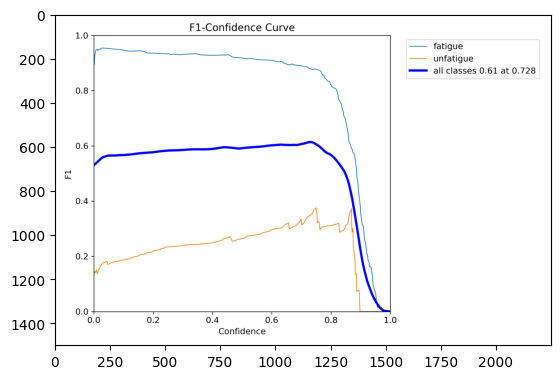

In [22]:
f1_curve = plt.imread('./Synapses-Model/training001/F1_curve.png')
plt.imshow(f1_curve)

# 02. VALIDATION

In [7]:
model_trained = YOLO("Synapses-Model/training001/weights/best.pt")

In [9]:
metrics = model_trained.val(
    data="../dataset/data.yaml",
    project="Synapses-Model",
    name="validation",
)

Ultralytics YOLOv8.2.12  Python-3.11.9 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)


val: Scanning D:\CHALLENGES\synapsis\model\dataset\valid\labels.cache... 290 images, 0 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.36it/s]


                   all        290        290      0.596      0.654      0.609      0.518
               fatigue        290        267      0.953      0.831      0.951      0.813
             unfatigue        290         23       0.24      0.478      0.268      0.222
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to Synapses-Model\validation


### Confusion Matrix

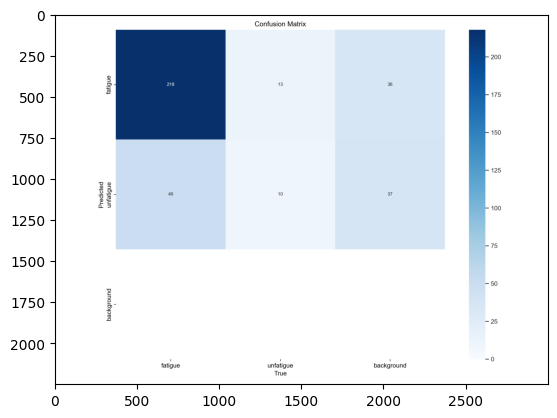

In [10]:
cf_matrix = plt.imread('./Synapses-Model/validation/confusion_matrix.png')
plt.imshow(cf_matrix)

### PR Curve

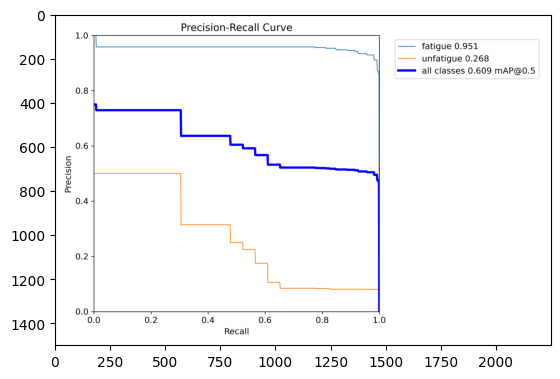

In [11]:
pr_curve = plt.imread('./Synapses-Model/validation/PR_curve.png')
plt.imshow(pr_curve)

### F1 Curve

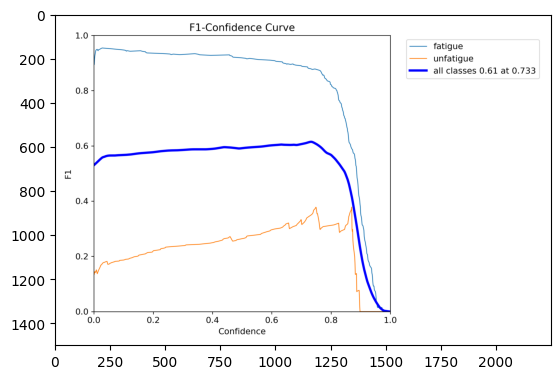

In [12]:
f1_curve = plt.imread('./Synapses-Model/validation/F1_curve.png')
plt.imshow(f1_curve)

### Prediction Sample

Text(0.5, 1.0, 'Prediction 2')

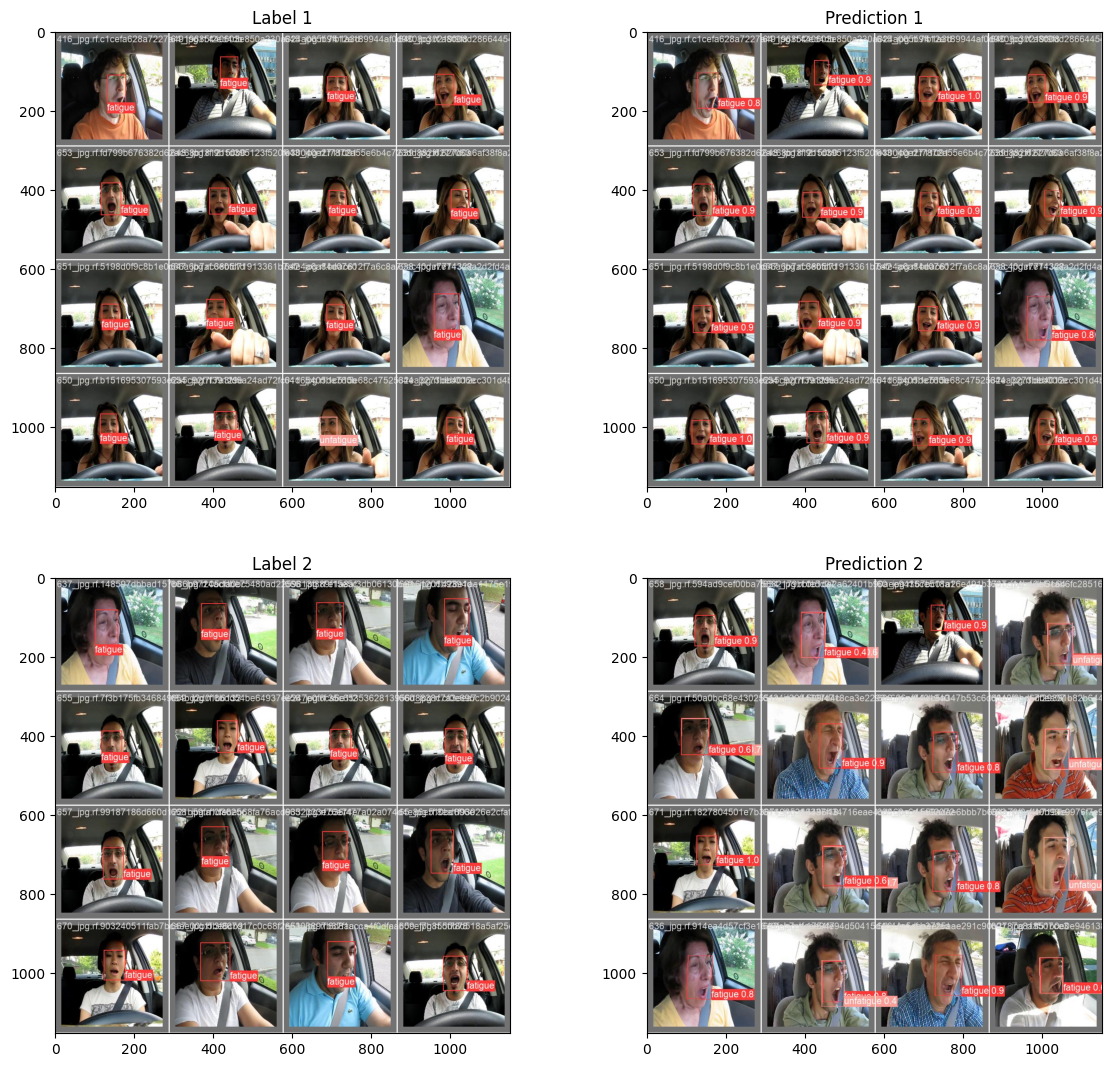

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 13))

val_label1 = plt.imread('./Synapses-Model/validation/val_batch0_labels.jpg')
ax1.imshow(val_label1)
ax1.set_title("Label 1")

val_pred1 = plt.imread('./Synapses-Model/validation/val_batch0_pred.jpg')
ax2.imshow(val_pred1)
ax2.set_title("Prediction 1")

val_label2 = plt.imread('./Synapses-Model/validation/val_batch1_labels.jpg')
ax3.imshow(val_label2)
ax3.set_title("Label 2")

val_pred2 = plt.imread('./Synapses-Model/validation/val_batch2_pred.jpg')
ax4.imshow(val_pred2)
ax4.set_title("Prediction 2")

# 03. TESTING

In [2]:
model_trained = YOLO("Synapses-Model/training001/weights/best.pt")

In [37]:
images_dir = './testing-images'
images = []

for path in os.listdir(images_dir):
    img_dir = os.path.join(images_dir, path)
    img = cv2.imread(img_dir)
    images.append(img)

results = model_trained(images, conf=0.6)

0: 256x256 16.0ms
1: 256x256 16.0ms
2: 256x256 16.0ms
Speed: 1.0ms preprocess, 16.0ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 256)


Text(0.5, 1.0, 'Test 3')

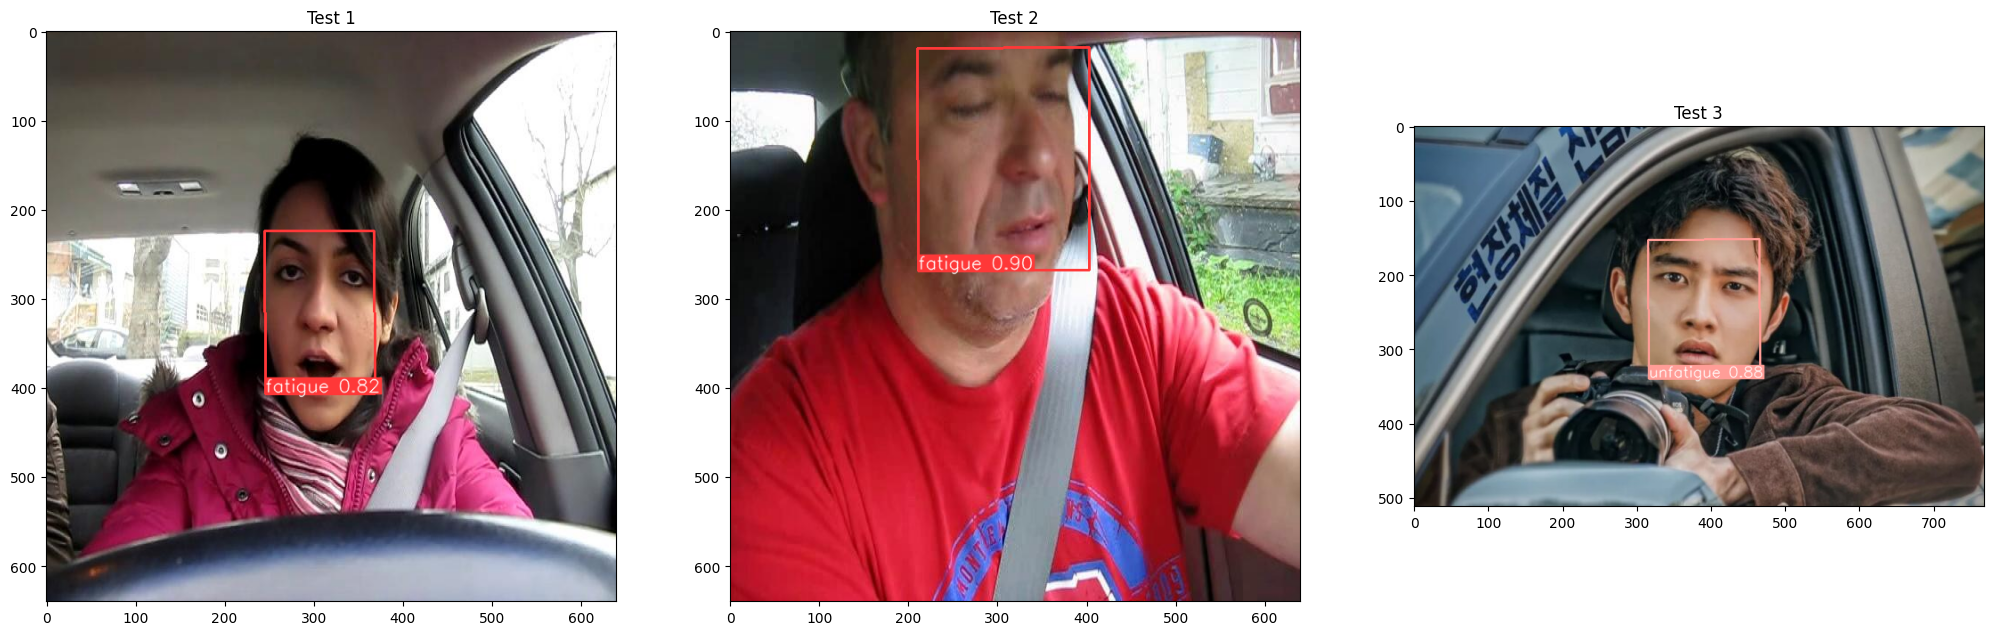

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 8))

ax1.imshow(Image.fromarray(results[0].plot()[...,::-1]))
ax1.set_title("Test 1")

ax2.imshow(Image.fromarray(results[1].plot()[...,::-1]))
ax2.set_title("Test 2")

ax3.imshow(Image.fromarray(results[2].plot()[...,::-1]))
ax3.set_title("Test 3")